# AutoEncoders
- 인공 신경망을 활용하여 이미지를 인코딩 및 디코딩을 하는것
  - 기존 인공 신경망의 원리는 같지만 입력층와 출력층을 똑같이 하여 인코딩과 디코딩을 구현한다.
  - 이미지 데이터 말고도 다른 형태의 데이터도 입력가능하다.
  - 데이터간의 상관관계가 있을 수록 이미지 복원이 깔끔하게 된다
    - 보통 이미지는 픽셀간의 연관이 있기때문에 AutoEnoders을 사용하기 적합하다.
    - 단순한 이미지이면 선형 AutoEncoders를 써도 되지만 복잡한 이미지는 합성곱 AutoEncoders를 사용하는것이 좋다
  - 활용분야: 노이즈 제거, 이미지 압축, 부정거래 감지,PCA(데이터셋 차원 수 감소)

### Importing the libraries

In [1]:
import tensorflow as tf
from tensorflow .keras.models import Sequential,Model
from tensorflow.keras.layers import Input, Dense
import matplotlib.pyplot as plt # 그래프 생성
import numpy as np


### Loading the dataset
- dataset: mnist데이타 사용
  - https://keras.io/api/datasets/mnist/

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [5]:
x_train[0][0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8)

In [6]:
y_train[0]

5

### Visualizing the images
- 이미지 시각화
  - 사람이 데이터를 분석하기 편하도록 데이터를 시각화해야한다.

5


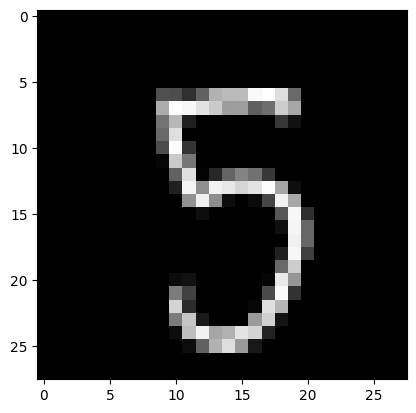

In [7]:
# random 인덱스 추출방법
i = np.random.randint(0,59999) # 데이터가 0~59999개
print(y_train[i])
plt.imshow(x_train[i],cmap='gray');

(10, 10)
(100,)


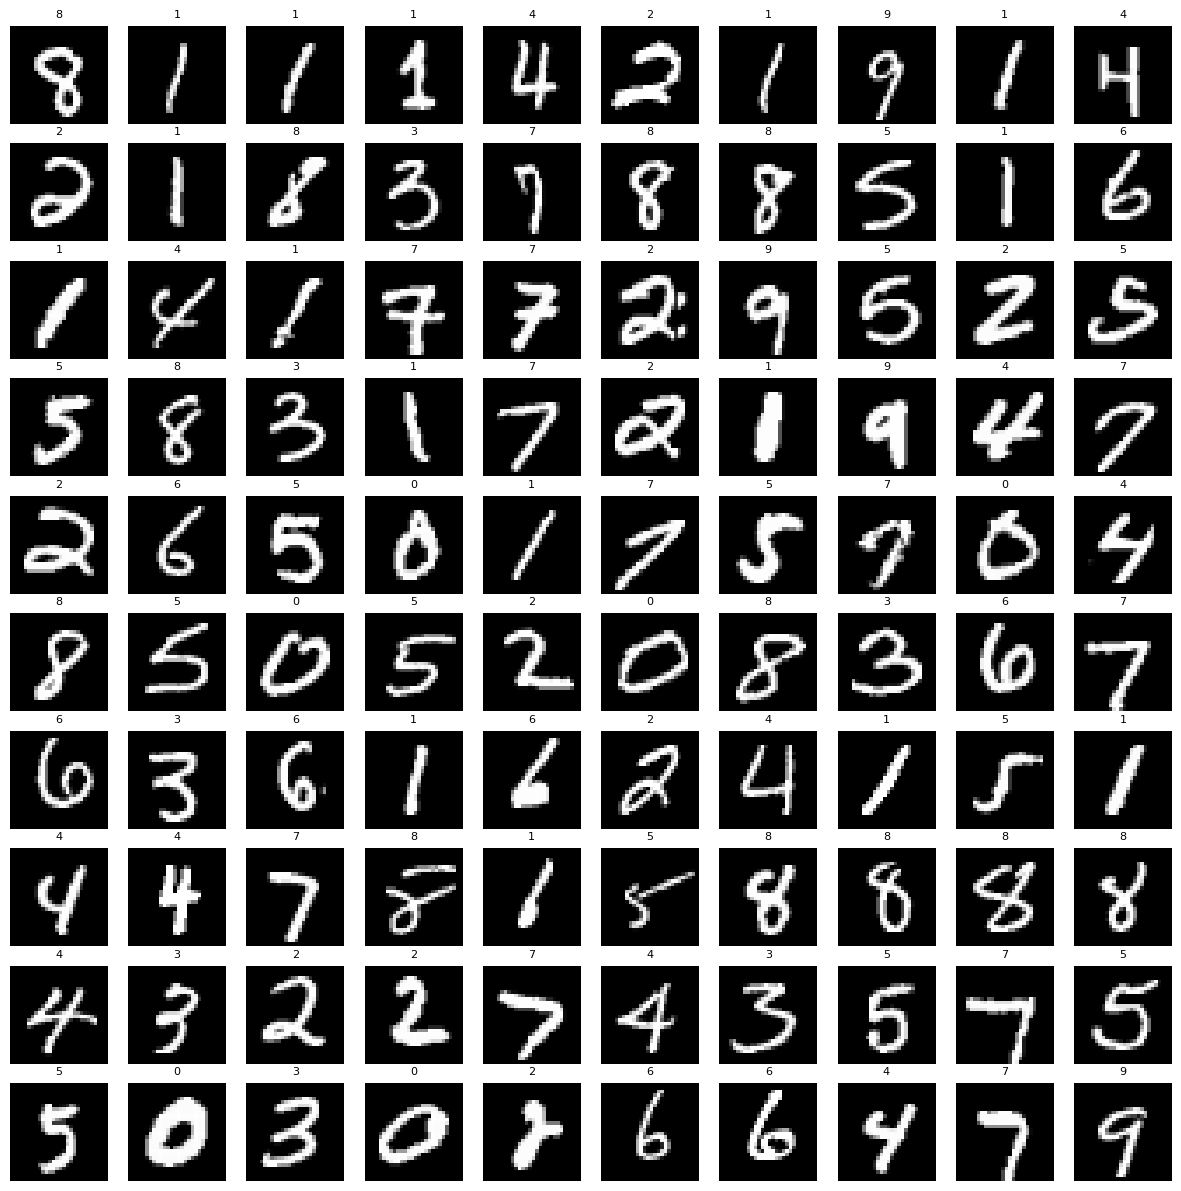

In [8]:
width = 10
height = 10
#fig(도표), axes
# plt.subplots(행의 개수, 열의 개수, figsize= 각 서브 그래프의 크기(x,y)) 연습
# 가로에 서브 그래프 10개 세로에 서브 그래프 10개인 그리드 도표가 만들어졌다
fig, axes = plt.subplots(height,width,figsize=(15,15) )
print(axes.shape)
#(10,10) 형태의 그리드를 일렬로 세운다
axes = axes.ravel() # ->(10,10) -> 100
print(axes.shape)
# 각각의 서브 그래프들을 순회하면서 랜덤으로 데이터셋안에 있는 그림은 삽입한다.
for i in np.arange(0,width * height) : # 0~ 100까
  index = np.random.randint(0,59999)
  axes[i].imshow(x_train[index],cmap='gray')
  axes[i].set_title(y_train[index], fontsize=8)
  # axis('off')를 안할시 제목에 다른 정보들도 같이 기록되어 보기 안좋다.
  axes[i].axis('off')

### Pre-processing the images

In [9]:
# 픽셀은 0~255 크기를 갖는다
x_train[0].min(), x_train[0].max()

(0, 255)

In [10]:
# 0~1사이에 값이 있을 수 있도록 정규화해준다
x_train = x_train/255
x_test= x_test/255

In [11]:
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [12]:
x_train.shape[0], x_train.shape[1], x_train.shape[2]

(60000, 28, 28)

In [13]:
# 선형 인코더는 입력으로 모든 픽셀을 다 사용하기 때문에 행렬로 되어있는 데이터를 1차원 벡터로 변환해주어야한다
# reshape를 하면
x_train= x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
x_train.shape

(60000, 784)

In [14]:
# 선형 인코더는 입력으로 모든 픽셀을 다 사용하기 때문에 행렬로 되어있는 데이터를 1차원 벡터로 변환해주어야한다
x_test= x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])
x_test.shape

(10000, 784)

### 선형 오토인코더 구축 및 학습
- 784 -> 128 -> 64 -> 32 -> 64 -> 128 -> 784
- Encode, Decode 학습은 모두 하나의 모델에서 하지만 각각의 기능은 독립적으로 동작한다.
  - 따라서 전체 신경망을 한번에 학습한 후 신경망을 분리하여야한다.

In [15]:
autoencoder = Sequential()

# Encode
autoencoder.add(Dense(units = 128, activation='relu', input_dim=784))
autoencoder.add(Dense(units=64, activation='relu'))
autoencoder.add(Dense(units=32, activation='relu')) # Encoded image

# Decode
autoencoder.add(Dense(units=64, activation='relu'))
autoencoder.add(Dense(units=128, activation='relu'))
# 활성화 함수가 시그모이드인 이유는 정규화된 픽셀값들은 0~1사이이다. sigmoid의 반환값도 0~1사이이기때문이다.
autoencoder.add(Dense(units=784, activation='sigmoid'))

In [16]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
Total params: 222384 (868.69 KB)
Trainable params: 22238

In [17]:
# sigmoid이기때문에 binary_crossentropy를 사용한다
autoencoder.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [19]:
# 입력 데이터와 라벨 데이터가 같다 -> 오토인코더는 자기 자신이 결과로 나와야되기 때문이다.
# 정확도는 중요하지 않다. -> 어차피 모든픽셀을 비교해서 정확도가 높게 나올수가 없기 때문이다.
autoencoder.fit(x_train,x_train,epochs=50)


Epoch 1/50
1875/1875 [==============================] - 19s 8ms/step - loss: 0.1511 - accuracy: 0.0114
Epoch 2/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1086 - accuracy: 0.0114
Epoch 3/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1009 - accuracy: 0.0121
Epoch 4/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0964 - accuracy: 0.0123
Epoch 5/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0934 - accuracy: 0.0133
Epoch 6/50
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0913 - accuracy: 0.0133
Epoch 7/50
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0897 - accuracy: 0.0140
Epoch 8/50
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0883 - accuracy: 0.0132
Epoch 9/50
1119/1875 [================>.............] - ETA: 4s - loss: 0.0873 - accuracy: 0.0129

KeyboardInterrupt: 

### Encoding the images
- 여태까지 인코딩 디코딩을 갖이 모아둔 신경망을 구축하였다. 각각의 기능을 독립적으로 활용하기 위해선 신경망 모델을 분리하여야한다.


In [20]:
# Model은 이미 생성된 모델을 분할하는 도구이다
# inputs으론 우리가 만든 784를 입력으로 받는 autoencoder.input레이어를 활용한다
# Encoder의 outputs은 인코딩되어 픽셀이 32개밖에 없는 데이터이다.
# 따라서 layer name = dense_2 가 output이다.
# get_layer('layer 이르').output은 해당 층을 가져오고 그 층들의 값을 output으로 내보낸다.
encoder = Model(inputs = autoencoder.input, outputs= autoencoder.get_layer('dense_2').output)

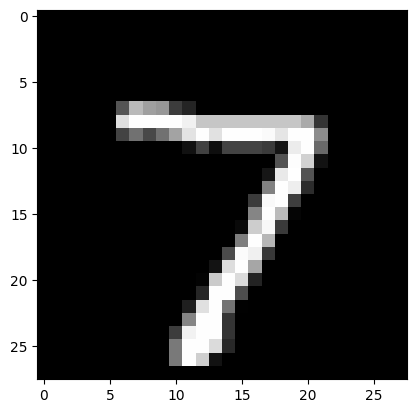

In [21]:
# 우리가 예시로 인코딩 디코딩한 이미지이다.
# 우리의 입력층의 개수는 784(28*28)이므로 reshape으로 이미지를 축소시킨다.
plt.imshow(x_test[0].reshape(28,28), cmap='gray');

In [22]:
# x_test[0]은 행과 열로 되어져있는 이미지이다. encoder에 입력할 수 있도록 평탄화를 해주어야한다.
encoded_image = encoder.predict(x_test[0].reshape(1,-1))

1/1 [==============================] - 0s 87ms/step


In [23]:
# 32개의 출력이 나왔다. 이 출력은 평탄화 되어있는 형태이다.
encoded_image, encoded_image.shape

(array([[ 2.9108593,  5.6525145, 12.699604 ,  9.035422 , 10.688739 ,
          0.       ,  0.       , 10.66845  ,  5.9707594,  0.       ,
          9.034696 ,  4.6864276,  6.10004  ,  5.697092 , 10.074263 ,
          4.468905 ,  3.78328  ,  3.2963338,  4.5658   ,  3.859572 ,
          9.338028 , 11.810867 ,  5.5535917,  7.9129734,  7.802763 ,
          5.177922 ,  1.8821882,  6.7558303,  8.655998 ,  7.640281 ,
         10.272045 ,  7.8498116]], dtype=float32),
 (1, 32))

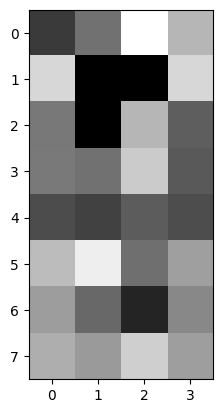

In [24]:
# 평탄화 되어있는 encoded_image를 사람이 보기쉽게 (8,4)형태의 이미지로 바꿔서 특징맵을 본다.
plt.imshow(encoded_image.reshape(8,4),cmap='gray');

### Decoding the images
- 인코더처럼 디코더도 기존의 신경망에서 따로 빼와야한다.
  - 하지만 인코더와 달리 디코더는 중간 레이어에서 입력을 받기때문에 입력층을 따로 만들어야한다.

In [25]:
input_layer_decoder = Input(shape=(32,))
decoder_layer1 = autoencoder.layers[3] # layers[i]는 몇번째 layer를 가져올것인가이다.
decoder_layer2 = autoencoder.layers[4]
decoder_layer3 = autoencoder.layers[5]
# Model의 input레이어는 사용자가 정의한 input_layer_decoder로 32픽셀을 받아온다.
# 그 다음 레이어를 추가해주어야 한다. 각각의 레이어를 연결하는 방법은 레이어(이전레이어)이다.
# 따라서 가장 처음 레이어인 input_layer_Deconder가 안쪽 괄호에 있고 두번째 레이어인 decoder_layer1이 두번째 안쪽 괄호에 있다.
decoder = Model(inputs = input_layer_decoder, outputs = decoder_layer3(decoder_layer2(decoder_layer1(input_layer_decoder))))

In [26]:
decoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32)]              0         
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
Total params: 111568 (435.81 KB)
Trainable params: 111568 (435.81 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
decoded_image = decoder.predict(encoded_image)

1/1 [==============================] - 0s 84ms/step


In [28]:
decoded_image.shape

(1, 784)

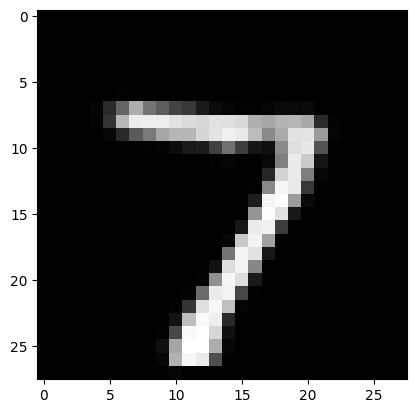

In [29]:
plt.imshow(decoded_image.reshape(28,28),cmap='gray');

### Encoding and decoding the test images
- 여러 테스트 이미지를 autoencoder에 적용하고 test하기
  - 분석하기 편하도록 분석 결과를 시각화 하자.


In [30]:
x_test.shape[0] # 0~9999의 인덱스를 가진다

10000

1/1 [==============================] - 0s 21ms/step


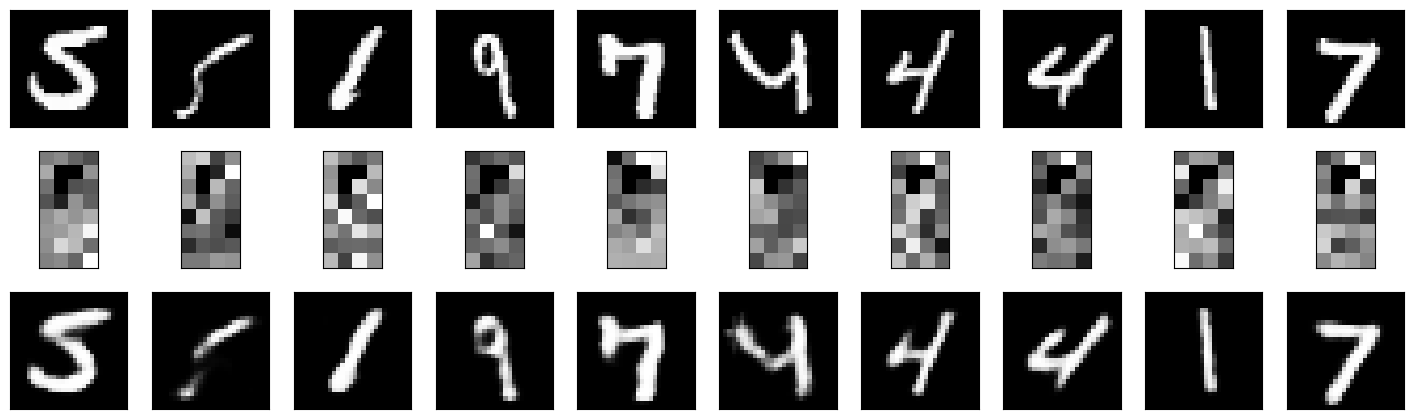

In [66]:
# 모든 데이터를 다 테스트 하긴 오래걸리니 랜덤으로 10개의 이미지만 테스트 한다.
n_images=10
test_images = np.random.randint(0,x_test.shape[0] - 1, size = n_images)

# 그래프 크기 18,18
plt.figure(figsize=(18,18))
for i, image_index in enumerate(test_images):
  # Encoded images
  ax = plt.subplot(10,10,i+1)
  plt.imshow(x_test[image_index].reshape(28,28), cmap='gray')
  plt.xticks(())
  plt.yticks(())

  # Coded images
  ax = plt.subplot(10,10,i+1+n_images)
  encoded_image = encoder.predict(x_test[image_index].reshape(1,-1))
  plt.imshow(encoded_image.reshape(8,4), cmap='gray')
  plt.xticks(())
  plt.yticks(())

  # Decoded images
  ax = plt.subplot(10,10,i+1+n_images*2)
  plt.imshow(decoder.predict(encoded_image).reshape(28,28),cmap='gray')
  plt.xticks(())
  plt.yticks(())

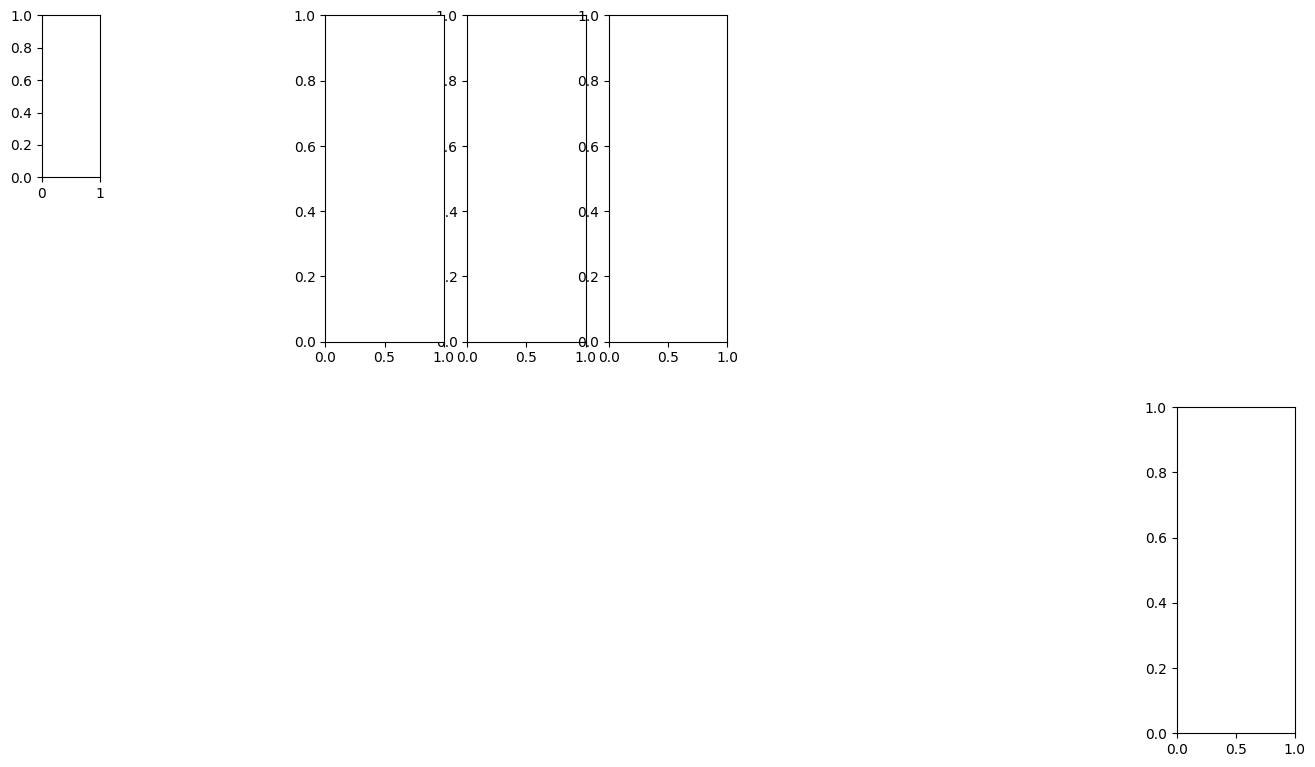

In [67]:
# plt 연습
plt.figure(figsize=(18,50))
ax = plt.subplot(20,20,1)
ax = plt.subplot(10,10,4)
ax = plt.subplot(10,10,5)
ax = plt.subplot(10,10,3)
ax = plt.subplot(10,10,19)

### Convolutional autoencoders
- 모든 픽셀을 다 입력하면 너무 신경망이 커진다. 따라서 특징을 추출하고 그 특징맵을 autoencoder의 신경망에 넣어 인코딩한다. 디코딩은 인코딩의 역순으로 한다
- 데이터셋 : https://keras.io/api/datasets/fashion_mnist/
  - mnist데이터 셋의 추가적인 버전으로 fashion의 이미지를 갖고있다.

### Importing the libraries

In [68]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Reshape, Flatten

### Loading the dataset

In [69]:
from tensorflow.keras.datasets import fashion_mnist

In [72]:
(x_train,y_train), (x_test,y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [73]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [74]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

### Visualizing the images


(100,)


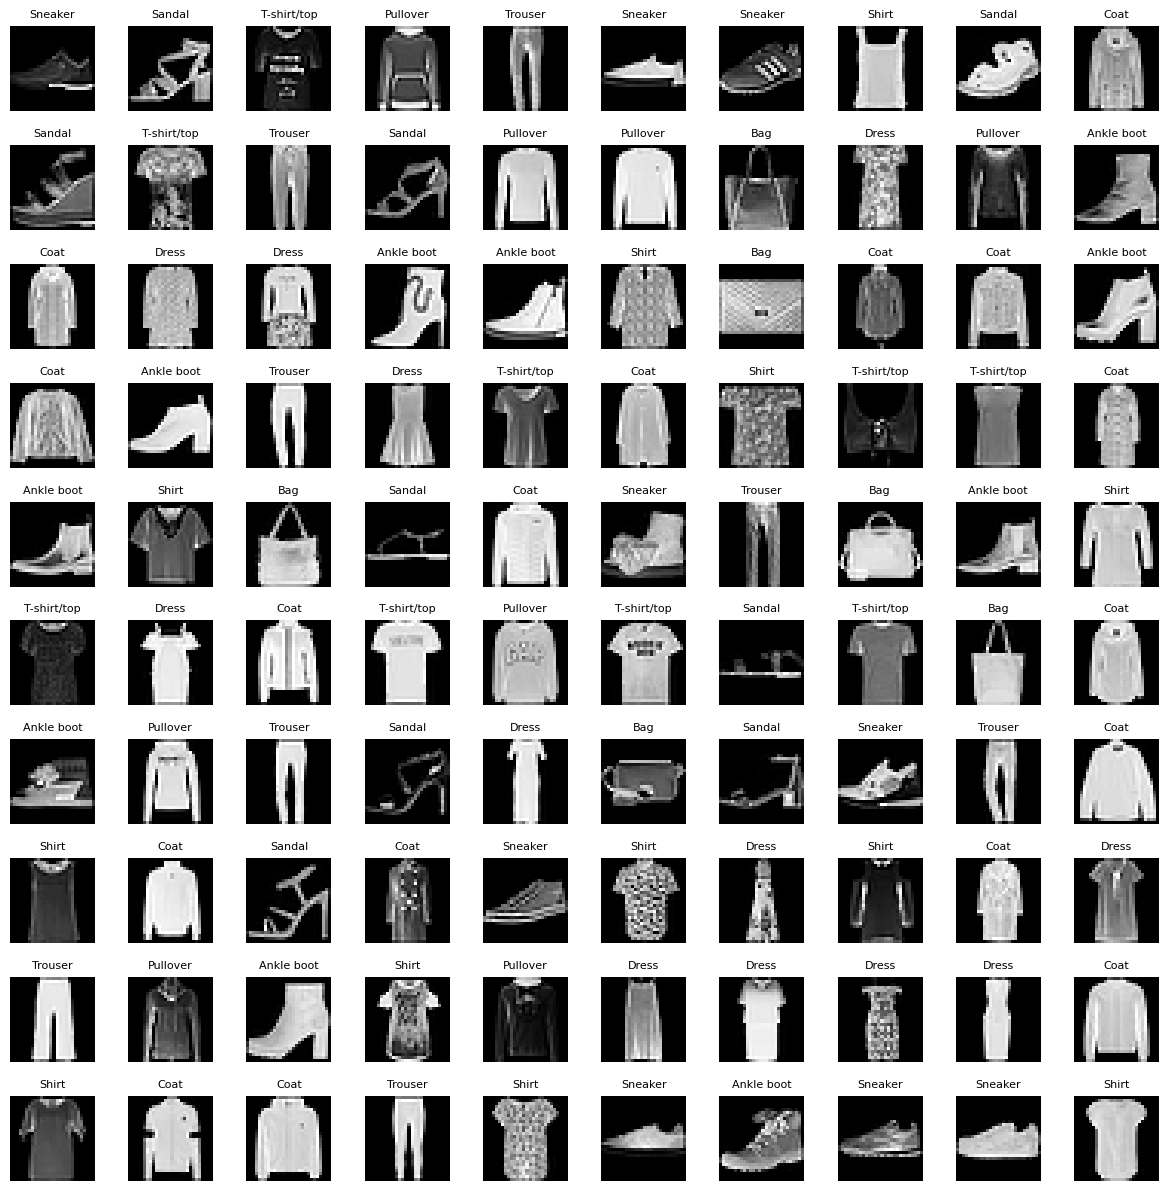

In [79]:
# 데이터 셋 클래스 라벨
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag',  'Ankle boot']
width = 10
height = 10
# fig(도표), axes
# # plt.subplots(행의 개수, 열의 개수, figsize= 각 서브 그래프의 크기(x,y)) 연습
# 가로에 서브 그래프 10개 세로에 서브 그래프 10개인 그리드 도표가 만들어졌다
fig, axes = plt.subplots(height,width,figsize=(15,15))
#(10,10) 형태의 그리드를 일렬로 세운다
axes = axes.ravel() # ->(10,10) -> 100
print(axes.shape)
# 각각의 서브 그래프들을 순회하면서 랜덤으로 데이터셋안에 있는 그림은 삽입한다.
for i in np.arange(0,width * height) : # 0~ 100까지
  # 랜덤 인덱스 추출
  index = np.random.randint(0,59999)
  axes[i].imshow(x_train[index],cmap='gray')
  axes[i].set_title(classes[y_train[index]], fontsize=8)
  # axis('off')를 안할시 제목에 다른 정보들도 같이 기록되어 보기 안좋다.
  axes[i].axis('off')
# sub그래프들간의 사이간격을 조절하는 함수(hspace= 높이조절, wspace = 너비 조)
plt.subplots_adjust(hspace=0.4)

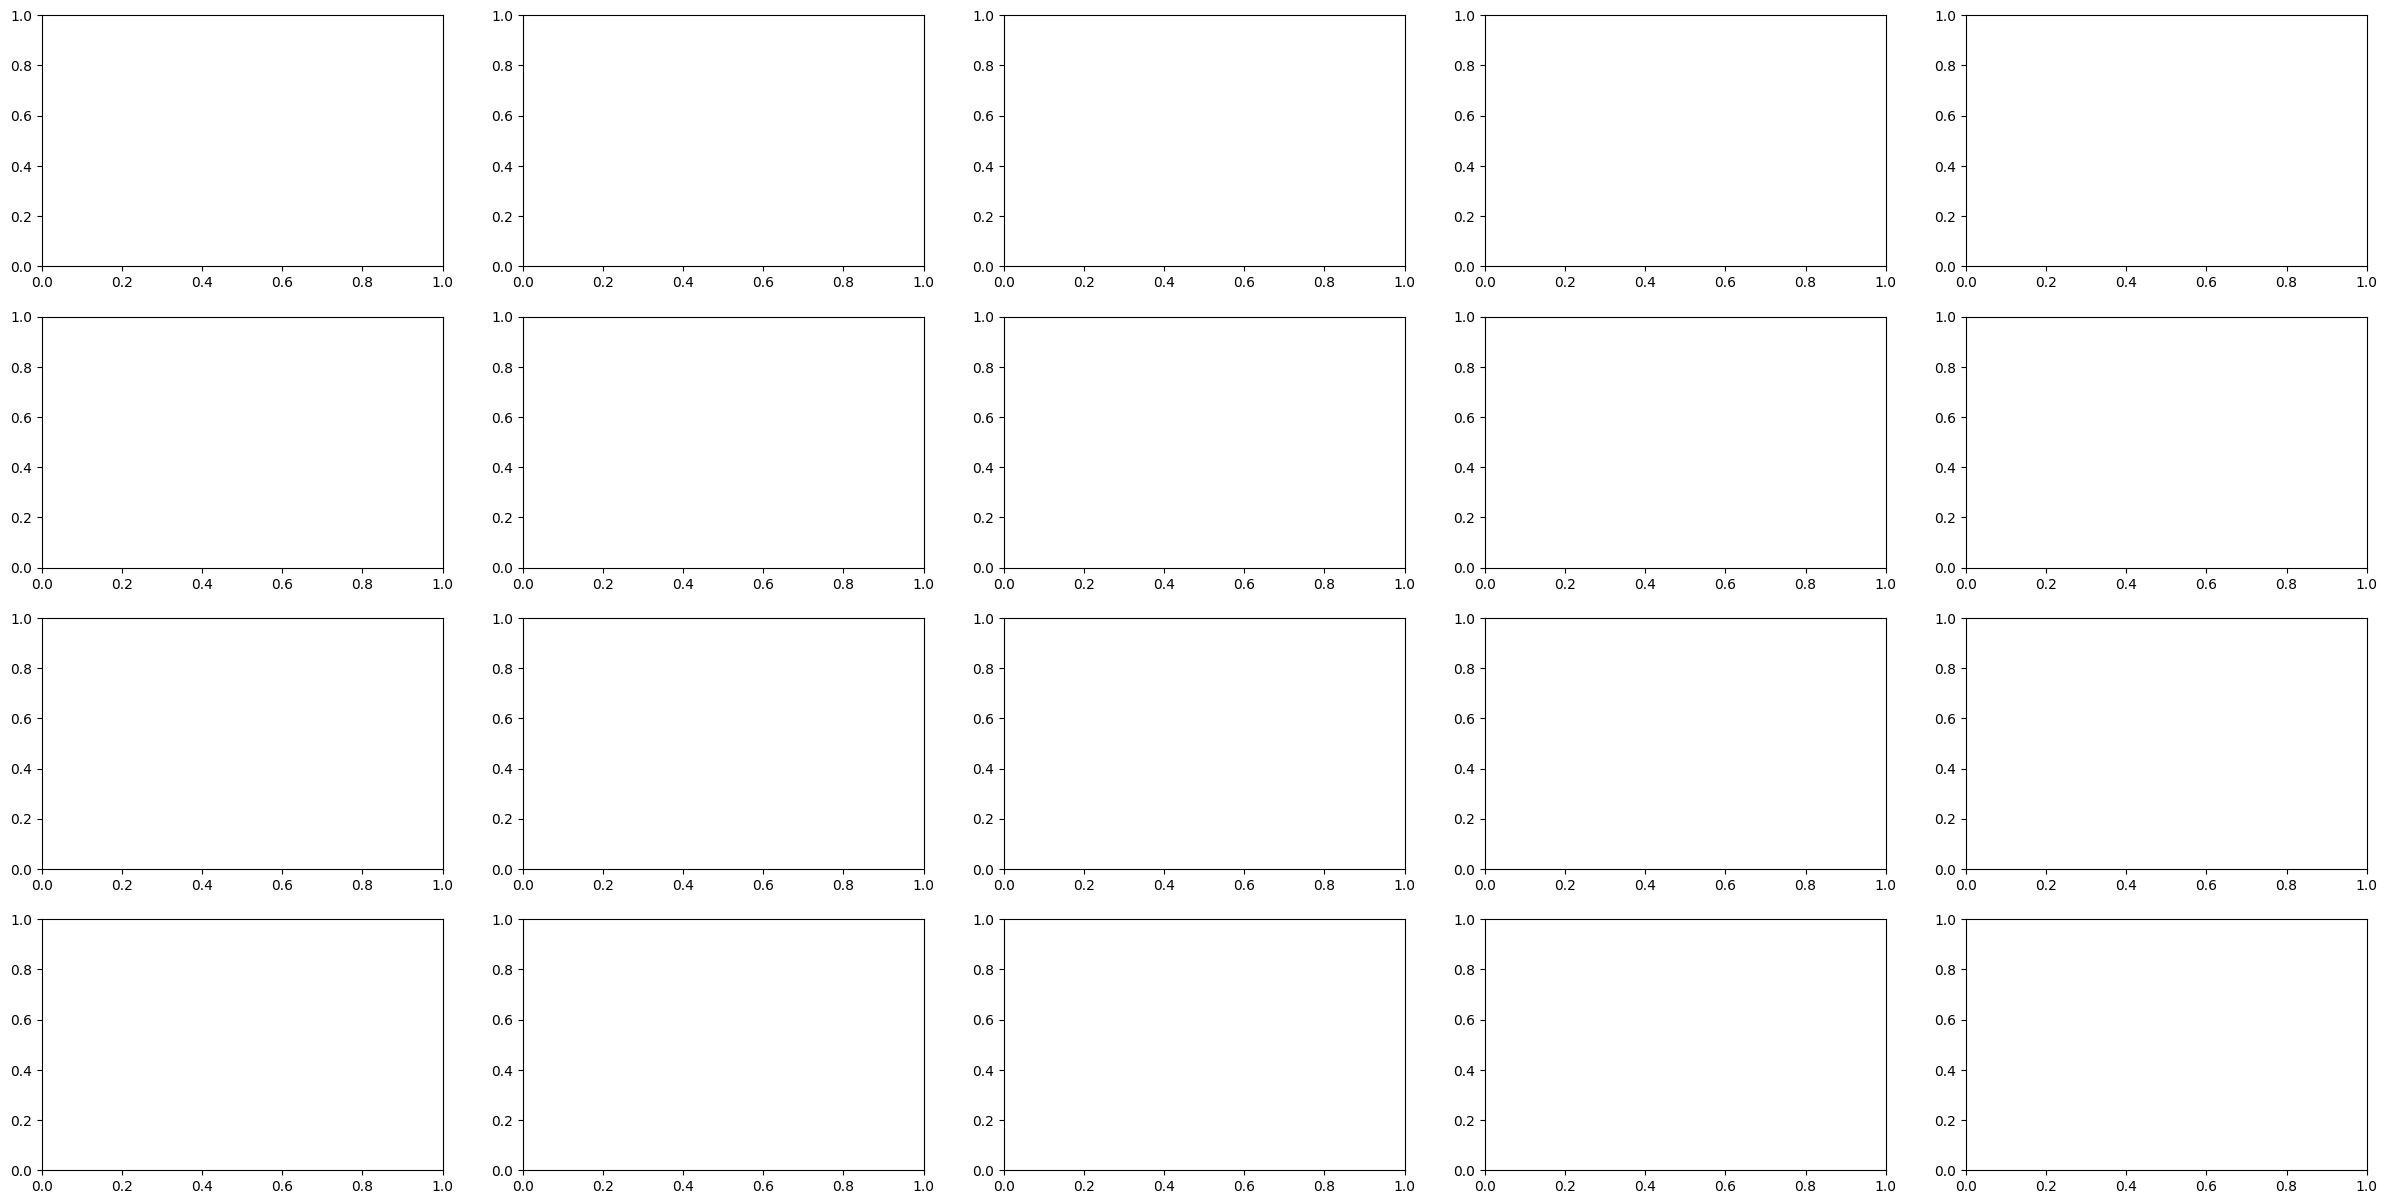

In [77]:
# plt.subplots(행의 개수, 열의 개수, figsize= 각 서브 그래프의 크기(x,y)) 연습
fig, axes = plt.subplots(4,5,figsize=(30,15))

### Pre-processing the images

In [80]:
x_train = x_train/ 255
x_test = x_test /255

In [86]:
#conv층의 입력 데이터를 구성할려면 (이미지수 * 가로 * 높이 * 채널 수)의 차원을 가져야한다
# 현재 사용할 데이터는 흑백이미지이기 때문에 채널 수 는 1개이다.
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [87]:
x_train = x_train.reshape((len(x_train), 28, 28, 1))
x_test = x_test.reshape((len(x_test), 28, 28, 1))

In [88]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

### Building and training the convolutional autoencoder

In [90]:
# padding에 대한 이해
# padding은 conv레이어에서 사용하는데 valid와 same이 있다
# 만약 3*3 픽셀에 커널이 2*2이고 스트라이드가 2일때 conv연산을 제대로 수행하는것은 불가능하다
# 이때 처리 방법이 padding인데 same은 만약 원본이미지의 크기가 작아서 conv연산을 못한다면 conv연산을 할 수 있을만큼 0으로 찬 픽셀을 추가해준다.
# vaild는 그냥 conv연산을 못하는 픽셀들을 과감히 버리는것이다.

# Vaild
padding_test1 = Sequential()

padding_test1.add(Conv2D(filters = 16,kernel_size=(3,3),activation='relu',padding = 'valid',input_shape = (28, 28, 1)))
# 연산을 못하는 부분을 버리기때문에 shape이 (28,28)에서 (26,26)으로 자동으로 줄었다
padding_test1.summary()


# Same
padding_test2 = Sequential()

padding_test2.add(Conv2D(filters = 16,kernel_size=(3,3),activation='relu',padding = 'same', input_shape = (28, 28, 1)))
# valid와 달리 무조건 input_sh
padding_test2.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
Total params: 160 (640.00 Byte)
Trainable params: 160 (640.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
Total params: 160 (640.00 Byte)
Trainable params: 160 (640.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [89]:
autoencoder = Sequential()

# Encoder

# Decoder
autoencoder.add(Conv2D(filters = 16,kernel_size=(3,3),activation='relu',input_shape = (28, 28, 1)))
autoencoder.add(MaxPooling2D(pool_size=(2,2)))

autoencoder.add(Conv2D(filters = 8,kernel_size=(3,3),activation='relu',padding='same'))
autoencoder.add(MaxPooling2D(pool_size=(2,2), padding ='same'))

autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 8)           0         
 g2D)                                                            
                                                                 
Total params: 1320 (5.16 KB)
Trainable params: 1320 (5.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
